## HR Dataset

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

Satisfaction Level
Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Departments (column sales)
Salary
Whether the employee has left

Source : Kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [4]:
Source = pd.read_csv('HR_comma_sep.csv')

## A GLIMPSE AT DATA

In [5]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
Source.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
Source.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## DATA EXPLORATION

In [70]:
# Copying orginal data
xSource = Source.copy()

In [71]:
xSource.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [72]:
corr = xSource.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


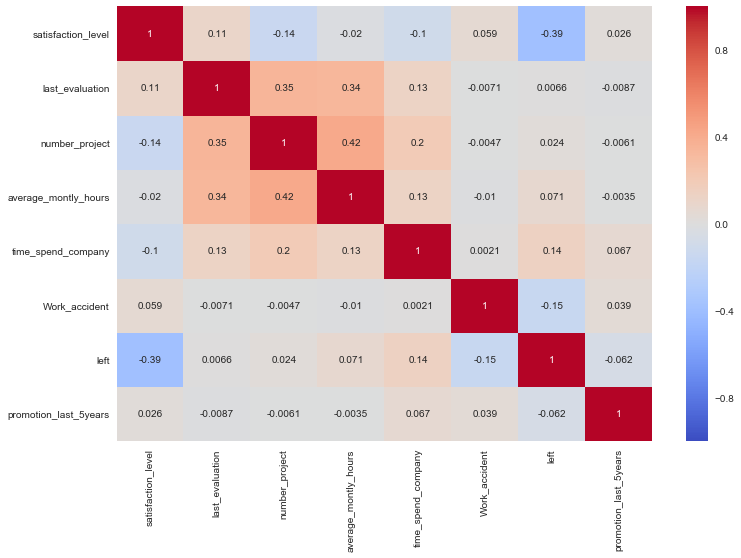

In [73]:
fig, ax = plt.subplots(figsize=(12,8))  
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm', annot=True)

From the correlation matrix, it is clear that the following columns are having good relationship:

number_project and last_evaluation, 

number_project and average_montly_hour


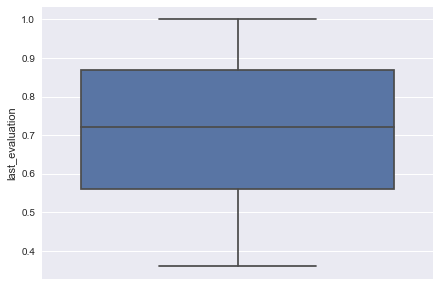

In [111]:
fig, ax = plt.subplots(figsize=(7,5))  
sns.boxplot( y=xSource["last_evaluation"])

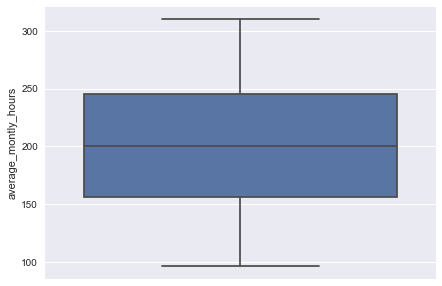

In [109]:
fig, ax = plt.subplots(figsize=(7,5))  
sns.boxplot( y=xSource["average_montly_hours"])

In [74]:
# Changing categorical data to hot code encoding and contatenating it to the source data

salesDummies = pd.get_dummies(xSource['sales']).astype('int64')
salaryDummies = pd.get_dummies(xSource['salary']).astype('int64')
xTemp = pd.concat([xSource,salesDummies,salaryDummies], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 23 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
IT                       14999 non-null int64
RandD                    14999 non-null int64
accounting               14999 non-null int64
hr                       14999 non-null int64
management               14999 non-null int64
marketing                14999 non-null int64
product_mng              14999 non-null int64
sales                    14999 non-null int64
support                  14999 non-null int64
technical  

In [78]:
# Dropping the categorical columns and using hot encoded values
xTemp.drop(['sales', 'salary'], axis=1, inplace=True)
xSource = xTemp.copy()

In [83]:
xSource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
IT                       14999 non-null int64
RandD                    14999 non-null int64
accounting               14999 non-null int64
hr                       14999 non-null int64
management               14999 non-null int64
marketing                14999 non-null int64
product_mng              14999 non-null int64
support                  14999 non-null int64
technical                14999 non-null int64
high                     14999 non-null int64
low                      14999 non-null int64
medium       

In [85]:
y = xSource['left']
X = xSource.drop('left', axis=1)

In [86]:
print(X.shape, y.shape)

(14999, 19) (14999,)


## TRAIN AND TEST DATA

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# MACHINE LEARNING

## Model evaluation

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_absolute_error

In [100]:
def modelEvaluation(orginalValues, predictedValues):
    print("MEAN ABSOLUTE ERROR: \n",mean_absolute_error(orginalValues, predictedValues))
    print("-------------------------------------------------------")
    print("ACCURACY SCORE: \n",accuracy_score(orginalValues, predictedValues))
    print("-------------------------------------------------------")
    print("CONFUSION MATRIX: \n",confusion_matrix(orginalValues, predictedValues))
    print("-------------------------------------------------------")
    print("CLASSIFICATION REPORT: \n",classification_report(orginalValues, predictedValues))

## 1. Random forest classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=1000, random_state=40)

In [106]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=40,
            verbose=0, warm_start=False)

In [107]:
predictions = rf.predict(X_test)

In [108]:
modelEvaluation(y_test, predictions)

MEAN ABSOLUTE ERROR: 
 0.0133333333333
-------------------------------------------------------
ACCURACY SCORE: 
 0.986666666667
-------------------------------------------------------
CONFUSION MATRIX: 
 [[3418   10]
 [  50 1022]]
-------------------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

          0       0.99      1.00      0.99      3428
          1       0.99      0.95      0.97      1072

avg / total       0.99      0.99      0.99      4500



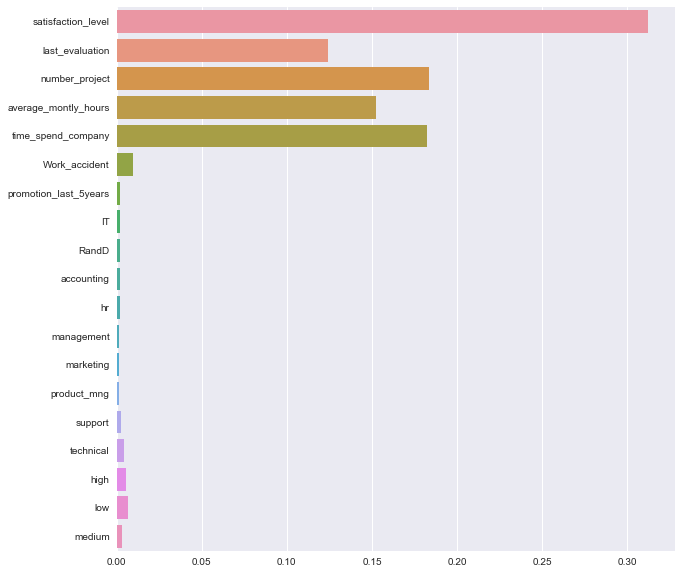

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(rf.feature_importances_,X_train.columns)